<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Lesson4_LinregBase/LinReg_OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Одномерная линейная регрессия

Для одномерной линейной регрессии модель предсказания целевого значения $y$ описывается уравнением прямой:

$$
y = \theta_0 + \theta_1 \cdot x
$$

где:
- $ \theta_0 $ — свободный член, или смещение, представляющий значение $ y $ при $ x = 0 $.
- $ \theta_1 $ — коэффициент наклона прямой, описывающий изменение $ y $ при изменении $ x $.

### Постановка задачи
Цель — найти такие параметры $ \theta_0 $ и $ \theta_1 $, которые минимизируют ошибку предсказаний. Мы используем **метод наименьших квадратов** (OLS), который минимизирует сумму квадратов отклонений между реальными значениями $ y $ и предсказанными значениями $ \hat{y} $:

$$
\text{Loss} = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

где $ y_i $ — истинное значение, $ \hat{y}_i = \theta_0 + \theta_1 \cdot x_i $ — предсказанное значение.

### Вывод формул для коэффициентов

Чтобы найти оптимальные $ \theta_0 $ и $ \theta_1 $, рассмотрим частные производные функции потерь по этим параметрам и приравняем их к нулю.

1. **Средние значения**:

   Пусть $ x_{\text{mean}} $ и $ y_{\text{mean}} $ обозначают средние значения по всем $ x_i $ и $ y_i $ соответственно:

   $$
   x_{\text{mean}} = \frac{1}{n} \sum_{i=1}^n x_i, \quad y_{\text{mean}} = \frac{1}{n} \sum_{i=1}^n y_i
   $$

2. **Формула для наклона $ \theta_1 $**:

   Производную функции потерь по $ \theta_1 $ приравниваем к нулю, что приводит к следующему уравнению для $ \theta_1 $:

   $$
   \theta_1 = \frac{\sum_{i=1}^n (x_i - x_{\text{mean}})(y_i - y_{\text{mean}})}{\sum_{i=1}^n (x_i - x_{\text{mean}})^2}
   $$

   Этот результат можно интерпретировать как соотношение между совместной ковариацией $ x $ и $ y $ к дисперсии $ x $.

3. **Формула для смещения $ \theta_0 $**:

   Подставим найденное значение $ \theta_1 $ в уравнение для среднего значения предсказаний $ \hat{y}_{\text{mean}} $:

   $$
   y_{\text{mean}} = \theta_0 + \theta_1 \cdot x_{\text{mean}}
   $$

   Отсюда:

   $$
   \theta_0 = y_{\text{mean}} - \theta_1 \cdot x_{\text{mean}}
   $$

### Итоговые формулы

Таким образом, мы получаем следующие аналитические выражения для коэффициентов линейной регрессии:

$$
\theta_1 = \frac{\sum_{i=1}^n (x_i - x_{\text{mean}})(y_i - y_{\text{mean}})}{\sum_{i=1}^n (x_i - x_{\text{mean}})^2}
$$

$$
\theta_0 = y_{\text{mean}} - \theta_1 \cdot x_{\text{mean}}
$$

Эти формулы позволяют нам найти параметры прямой, которые минимизируют сумму квадратов ошибок для данных точек $ (x_i, y_i) $.

In [34]:
import numpy as np

class SimpleLinearRegression:
    def __init__(self):
        self.theta_0 = 0  # Свободный член (перехват)
        self.theta_1 = 0  # Коэффициент наклона

    def fit(self, X, y):
        """
        Метод для обучения модели одномерной линейной регрессии.
        Параметры:
        X : numpy.ndarray : Вектор признаков (размерности [n_samples])
        y : numpy.ndarray : Вектор целевых значений (размерности [n_samples])
        """
        # Вычисляем средние значения X и y
        x_mean = np.mean(X)
        y_mean = np.mean(y)

        # Вычисляем theta_1 и theta_0
        numerator = np.sum((X - x_mean) * (y - y_mean))
        denominator = np.sum((X - x_mean) ** 2)
        self.theta_1 = numerator / denominator
        self.theta_0 = y_mean - self.theta_1 * x_mean

    def predict(self, X):
        """
        Метод для предсказания значений.
        Параметры:
        X : numpy.ndarray : Вектор признаков (размерности [n_samples])

        Возвращает:
        y_pred : numpy.ndarray : Предсказанные значения (размерности [n_samples])
        """
        return self.theta_0 + self.theta_1 * X

In [35]:
import numpy as np
import pandas as pd

# Параметры для генерации данных
np.random.seed(42)  # для воспроизводимости результатов
n_points = 100
true_w = 2.5  # истинный вес (наклон линии)
true_b = 1.0  # истинное смещение
noise_std = 3.0  # стандартное отклонение шума

# Генерация данных
X = np.random.uniform(-10, 10, n_points)  # равномерно распределенные значения признака x
noise = np.random.normal(0, noise_std, n_points)  # нормально распределенный шум
y = true_w * X + true_b + noise  # истинная линейная зависимость с добавлением шума

# Создаем DataFrame для удобства
data = pd.DataFrame({'x': X, 'y': y})

# Вывод первых пяти строк данных для проверки
print(data.head())

          x          y
0 -2.509198  -5.011853
1  9.014286  22.638693
2  4.639879  12.874979
3  1.973170  -0.029783
4 -6.879627 -16.858084


In [40]:
# Создаем экземпляр модели и обучаем её
model = SimpleLinearRegression()
model.fit(X, y)

# Делаем предсказания
y_pred = model.predict(X)

print("Веса:", model.theta_0, model.theta_1)
print("Предсказанные значения:", y_pred[:10])

Веса: 0.9556286319556975 2.4310340159315453
Предсказанные значения: [ -5.14431614  22.86966484  12.23533191   5.75247125 -15.76897909
 -15.77015182 -20.53064679  18.75936196   5.87190929  11.07225892]


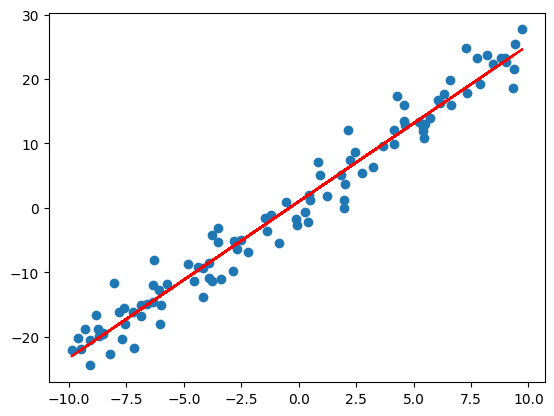

In [37]:
from matplotlib import pyplot as plt

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')

Добавим три выброса

In [77]:
outliers_X = np.array([-7, -2, -5])  # координаты по x для выбросов
outliers_y = np.array([200, 150, 500])  # координаты по y для выбросов

# Объединяем исходные данные с выбросами
X_with_outliers = np.concatenate([X, outliers_X])
y_with_outliers = np.concatenate([y, outliers_y])

In [78]:
model.fit(X_with_outliers, y_with_outliers)

# Делаем предсказания
y_pred = model.predict(X_with_outliers)

print("Веса:", model.theta_0, model.theta_1)

Веса: 8.759475047309191 1.3803418422610148


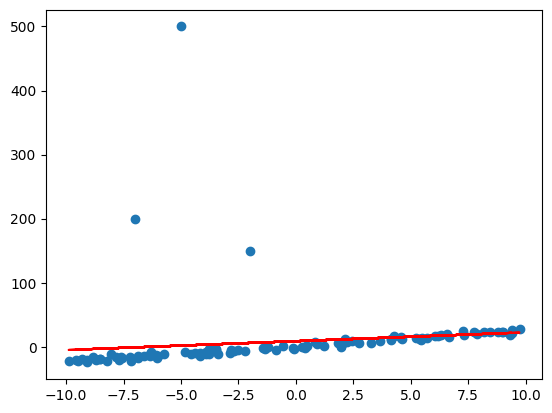

In [79]:
plt.scatter(X_with_outliers, y_with_outliers)
plt.plot(X_with_outliers, y_pred, color='red')

Какие выводы мы сделаем?

# Многомерная линейная регрессия

Формула для вычисления весов $ \theta $ линейной регрессии методом наименьших квадратов (МНК) в матричном виде выглядит следующим образом:

$$
\theta = (X^T X)^{-1} X^T y
$$

где:
- $ X $ — матрица признаков размерности $ (n \times d) $, где $ n $ — количество наблюдений, а $ d $ — количество признаков (с добавленным столбцом единиц для учёта свободного члена)
- $ y $ — вектор значений целевой переменной размерности $ (n \times 1) $

In [ ]:
import numpy as np

class LinearRegressionOLS:
    def __init__(self):
        self.theta = None  # Коэффициенты модели

    def fit(self, X, y):
        """
        Метод для обучения модели линейной регрессии.
        Параметры:
        X : numpy.ndarray : Матрица признаков (размерности [n_samples, n_features])
        y : numpy.ndarray : Вектор целевых значений (размерности [n_samples])
        """
        # Добавляем единичный столбец к X для учета свободного члена
        X_bias = np.c_[np.ones(X.shape[0]), X]

        # Вычисляем параметры с использованием формулы OLS
        self.theta = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

    def predict(self, X):
        """
        Метод для предсказания значений.
        Параметры:
        X : numpy.ndarray : Матрица признаков (размерности [n_samples, n_features])

        Возвращает:
        y_pred : numpy.ndarray : Предсказанные значения (размерности [n_samples])
        """
        # Проверяем, что модель обучена
        if self.theta is None:
            raise ValueError("Модель не обучена. Сначала вызовите метод fit.")

        # Добавляем единичный столбец к X
        X_bias = np.c_[np.ones(X.shape[0]), X]

        # Предсказание
        return X_bias @ self.theta

In [ ]:
# Пример данных
X = np.array([[1, 5], [2, 4], [3, 5], [4, -1], [5, 8]])  # Признаки
y = np.array([2, 3, 4, 5, 6])  # Целевые значения

# Создаем экземпляр модели и обучаем её
model = LinearRegressionOLS()
model.fit(X, y)

# Делаем предсказания
X_new = np.array([[6, 6], [0, 7]])
y_pred = model.predict(X_new)

print("Веса:", model.theta)
print("Предсказанные значения:", y_pred)

Веса: [1.00000000e+00 1.00000000e+00 1.38777878e-16]
Предсказанные значения: [7. 1.]
